<a href="https://colab.research.google.com/github/marcoharuni95/sampling-strategies/blob/main/fixed%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load model and tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()

# Input prompt
prompt = "The future of artificial intelligence is "

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate using greedy decoding
output_ids = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=50,
    do_sample=False,  # <-- this disables sampling → greedy decoding
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(output_text)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The future of artificial intelligence is  a matter of debate. The question is whether we can make it work.
The answer is yes.
The future of artificial intelligence is  a matter of debate. The question is whether we can make it work.
The answer is


In [3]:
# Generate using plain random sampling (no top-k or top-p)
output_ids = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=50,
    do_sample=True,      # enable sampling
    temperature=1.0,     # keep normal distribution shape
    pad_token_id=tokenizer.eos_token_id
)
print(tokenizer.decode(output_ids[0], skip_special_tokens=True))

The future of artificial intelligence is  something that will grow in complexity and sophistication. So it must be an area where the science is expanding rapidly.  The goal is to understand how to grow more fully to what we call intelligent computers.  This may take, for example, a


In [4]:
# Generate using top-k sampling
output_ids = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=50,
    do_sample=True,      # must be True for top-k to work
    top_k=10,            # only sample from the top 10 tokens
    temperature=1.0,     # optional: lower for safer output
    pad_token_id=tokenizer.eos_token_id
)
print(tokenizer.decode(output_ids[0], skip_special_tokens=True))

The future of artificial intelligence is ills and ills. There are no winners and no losers. There is only an end."

But in the future, there might be some winners and some losers, too. The next generation of AI will be a lot smarter, more complex


In [5]:
# Generate with top-p sampling
output_ids = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=50,
    do_sample=True,
    top_p=0.45,
    temperature=2.0,
    pad_token_id=tokenizer.eos_token_id
)
print(tokenizer.decode(output_ids[0], skip_special_tokens=True))


The future of artificial intelligence is  an open question, but it may be in the future that you will get more data in less time and the human race has more power.  It will also help you learn from others about your future and be able to do better on your


In [6]:
# Generate with min-p sampling
output_ids = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=50,
    do_sample=True,
    min_p=0.08,
    temperature=1.5,
    pad_token_id=tokenizer.eos_token_id
)
print(tokenizer.decode(output_ids[0], skip_special_tokens=True))


The future of artificial intelligence is icky stuff; the future of information security and information literacy has nothing to do with those two things at all. It's really quite the opposite.

Here's the thing, though. It's impossible to stop that stuff; even at our best


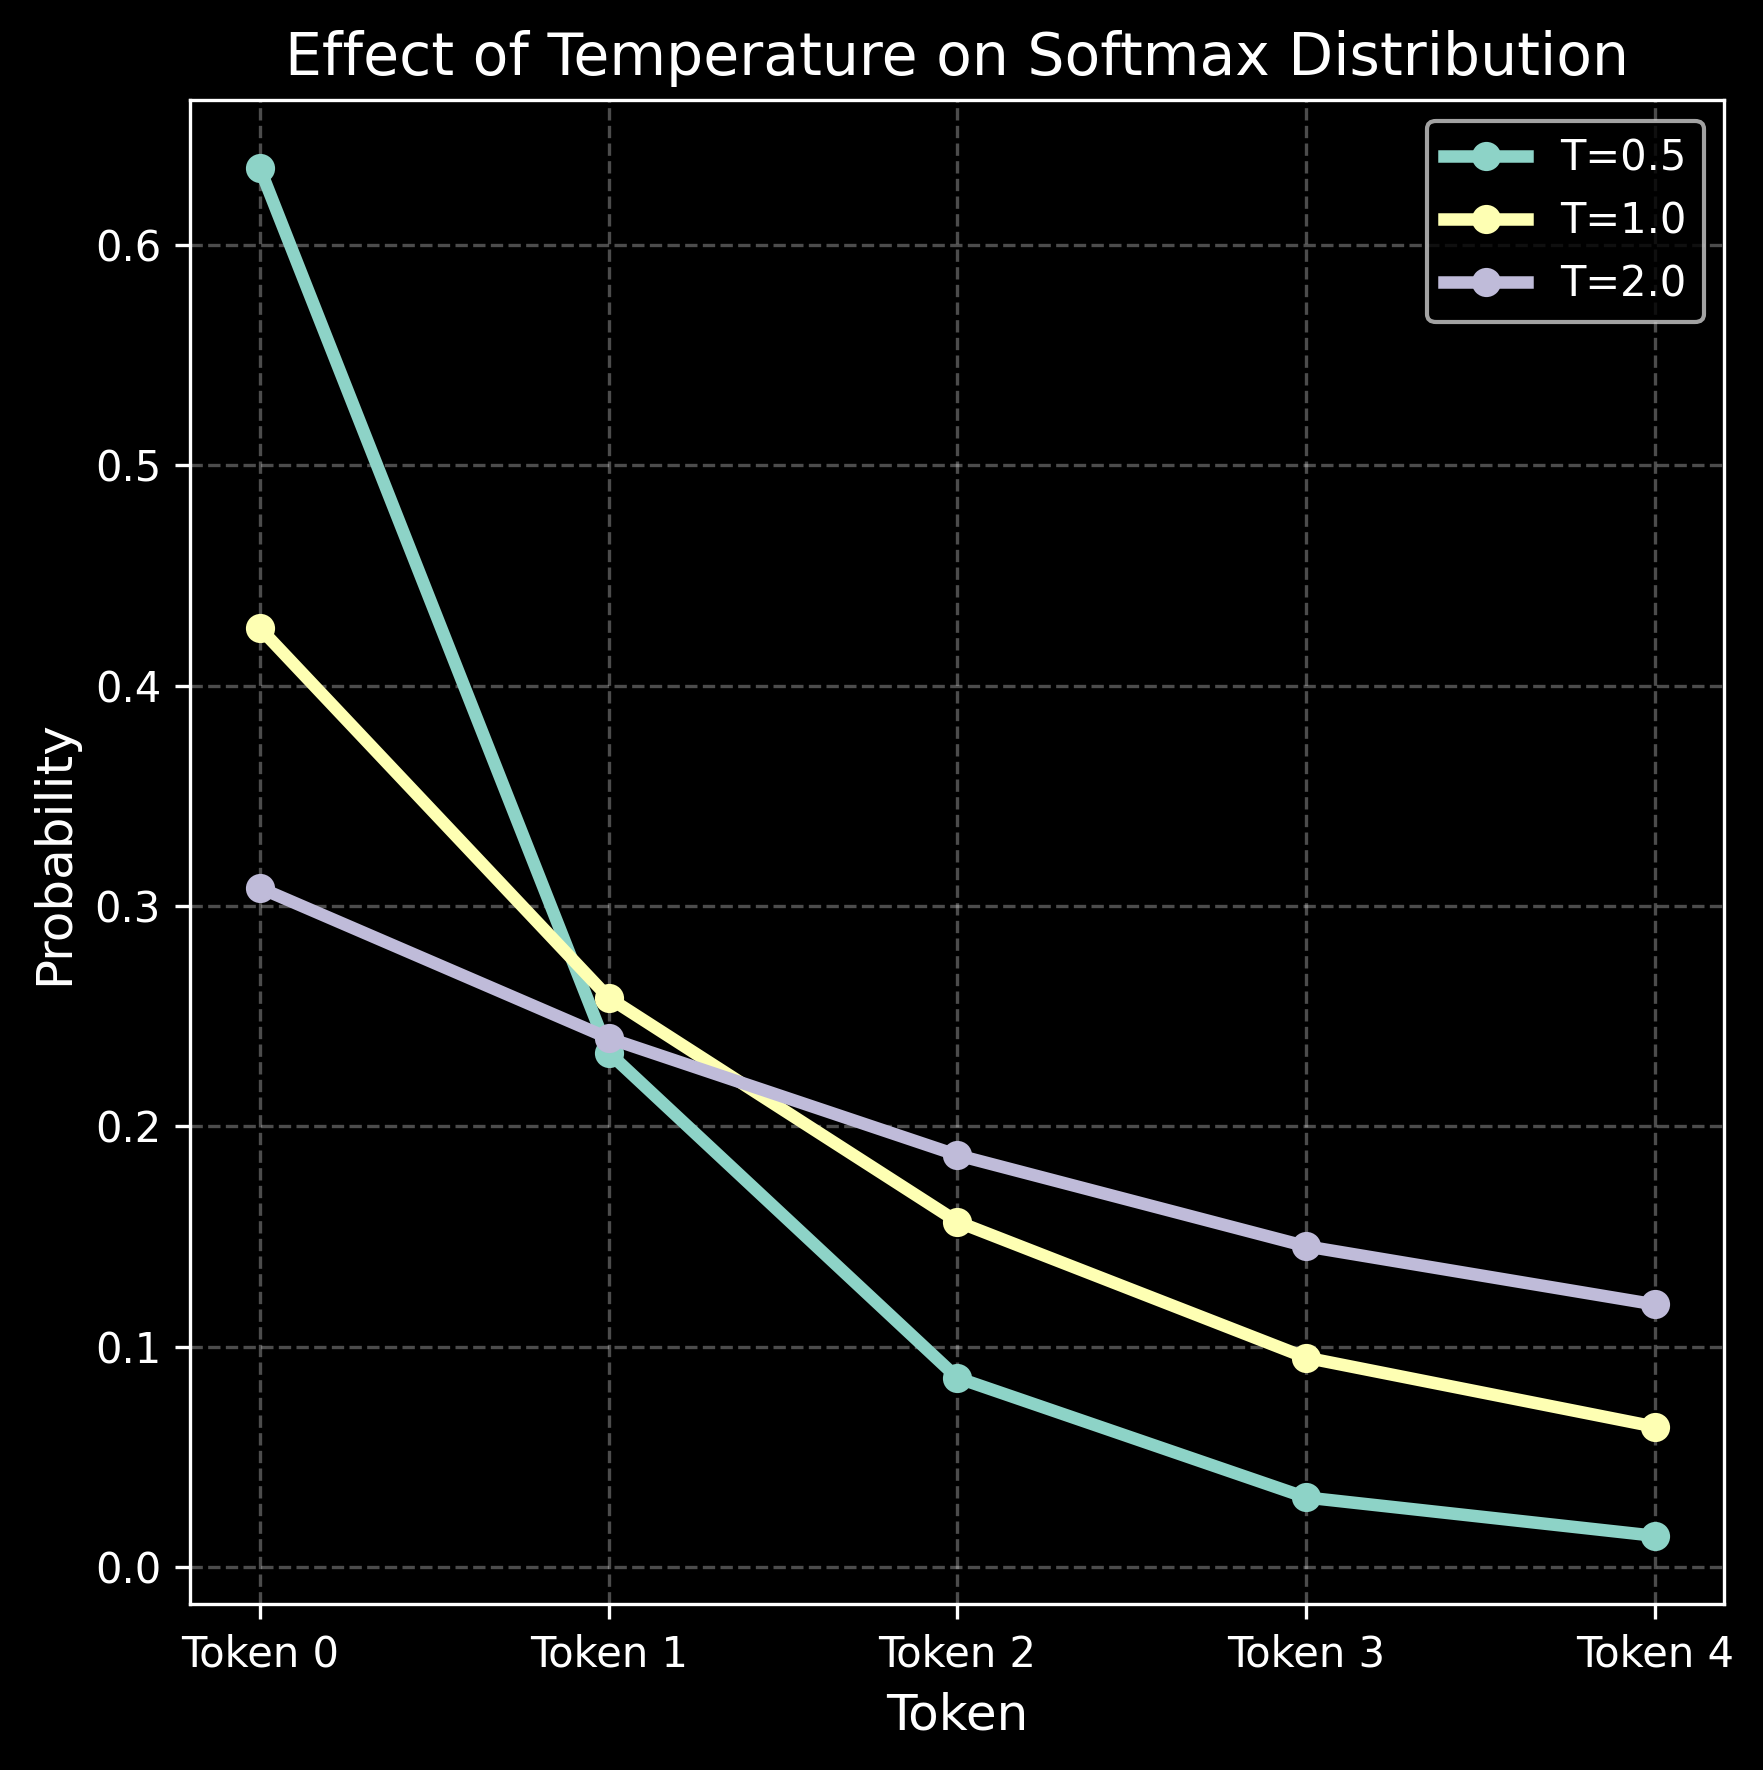

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

# Simulated logits (e.g., from a language model)
logits = np.array([2.0, 1.5, 1.0, 0.5, 0.1])

# Temperature values to test
temperatures = [0.5, 1.0, 2.0]

# Softmax function with temperature
def softmax_with_temp(logits, temp):
    scaled = logits / temp
    exps = np.exp(scaled - np.max(scaled))  # for numerical stability
    return exps / np.sum(exps)

# Plotting
plt.figure(figsize=(6, 6), dpi=300)
token_labels = [f"Token {i}" for i in range(len(logits))]

for temp in temperatures:
    probs = softmax_with_temp(logits, temp)
    plt.plot(token_labels, probs, marker='o', label=f'T={temp}', linewidth=3)

plt.title("Effect of Temperature on Softmax Distribution", fontsize=14)
plt.xlabel("Token", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()